In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/BIA_Batch10_Datasets/housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
binary = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [8]:
df[binary] = df[binary].apply(lambda x: x.map({'yes':1, 'no':0}))

In [9]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True, dtype=int)

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [11]:
X = df.drop('price', axis=1)

In [12]:
y = df['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

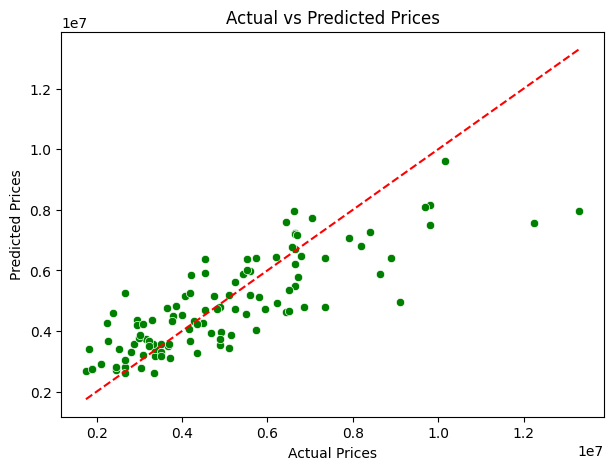

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.show()

#**Predicting Housing Prices: A Linear Regression Analysis**

This notebook presents a linear regression approach to predicting housing prices, highlighting the key stages from data preparation to model evaluation. The analysis leverages a dataset containing various housing features to build a predictive model.

The initial phase involved preparing the raw data for modeling. This crucial step included transforming categorical variables into a numerical format suitable for the linear regression algorithm. Binary features were converted to a 0/1 representation, while multi-category features like furnishing status were handled using one-hot encoding to capture their influence on price.

Following data preparation, the dataset was partitioned into features and the target variable (price). This separated data was then split into training and testing sets, a standard practice to ensure the model's performance is evaluated on unseen data. A Linear Regression model was subsequently trained on the training set, learning the relationships between the features and housing prices.

The final stage focused on evaluating the model's predictive capability. Predictions were generated for the house prices in the test set. To visualize the model's accuracy, a scatter plot was created, comparing the actual prices to the predicted prices. The proximity of the plotted points to a diagonal line representing perfect prediction visually summarized the model's performance.

In essence, this notebook demonstrates the application of linear regression for housing price prediction. By effectively preparing the data and training a model, the analysis provides a framework for understanding and forecasting housing values, with the scatter plot offering a clear visual assessment of the model's accuracy.